In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
salarios = pd.read_csv(r"Arquivo_Salarios_Colaboradores_2021.csv", sep=";")
salarios.head()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,1,8000.80,25,4,11,1,1,1,0,79.38
1,2,8500.17,24,5,11,0,0,1,0,84.13
2,3,3350.59,22,1,12,0,0,0,0,46.15
3,4,9500.24,28,4,14,1,0,0,1,83.85
4,5,1500.63,18,2,12,0,0,0,1,73.64


In [41]:
salarios.shape

(180, 10)

In [42]:
# análise inicial dos dados
salarios.describe().round(2)

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.0,180.00
mean,90.50,8539.49,31.07,9.07,12.58,1.27,0.28,0.55,0.5,71.74
std,52.11,4729.51,9.35,5.61,2.57,1.22,0.45,0.50,0.5,15.99
min,1.00,1500.63,18.00,1.00,7.00,0.00,0.00,0.00,0.0,34.48
25%,45.75,5491.23,24.00,5.00,11.00,1.00,0.00,0.00,0.0,60.41
50%,90.50,7551.12,28.00,7.00,13.00,1.00,0.00,1.00,0.5,72.08
75%,135.25,10584.68,36.00,13.00,14.00,1.00,1.00,1.00,1.0,83.85
max,180.00,25329.91,65.00,25.00,19.00,7.00,1.00,1.00,1.0,98.96


In [43]:
# vrificação das colunas
salarios.columns

Index(['Ordem', 'salario', 'idade', 'tempocasa', 'escolar', 'qproj_estra',
       'proj_sustent', 'proj_6sigma', 'proj_social', 'notaavalia'],
      dtype='object')

In [44]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(salarios.isnull().sum(),
            salarios.isnull().sum()/len(salarios)), 
            columns=['Count', 'Proportion'], 
            index=salarios.columns)

,Count,Proportion
Ordem,0,0.0
salario,0,0.0
idade,0,0.0
tempocasa,0,0.0
escolar,0,0.0
qproj_estra,0,0.0
proj_sustent,0,0.0
proj_6sigma,0,0.0
proj_social,0,0.0
notaavalia,0,0.0


In [45]:
salarios.nunique()

Ordem           180
salario         179
idade            37
tempocasa        24
escolar          13
qproj_estra       8
proj_sustent      2
proj_6sigma       2
proj_social       2
notaavalia      141
dtype: int64

In [46]:
# avaliando a variável quantidade de projetos
salarios[salarios.qproj_estra > 1]

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
13,14,16284.13,47,7,14,2,0,1,1,66.15
14,15,18120.84,65,9,14,2,0,1,1,76.56
17,18,13063.14,35,10,13,2,0,1,0,76.77
18,19,13844.19,54,15,11,4,0,1,1,61.98
19,20,14232.19,44,8,13,4,0,1,1,67.92
32,33,14500.65,24,6,16,2,0,1,1,84.13
40,41,9750.49,28,4,12,2,0,1,1,85.10
41,42,9750.51,28,6,12,2,0,1,1,75.10
42,43,8000.36,27,4,12,3,0,1,1,70.10
43,44,8100.44,27,6,12,3,0,1,1,70.10


In [47]:
salarios.drop("Ordem", axis=1, inplace=True)

In [48]:
salarios.head()

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,8000.80,25,4,11,1,1,1,0,79.38
1,8500.17,24,5,11,0,0,1,0,84.13
2,3350.59,22,1,12,0,0,0,0,46.15
3,9500.24,28,4,14,1,0,0,1,83.85
4,1500.63,18,2,12,0,0,0,1,73.64


In [49]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 12.8 KB


Após análise inicial dos dados, verificamos que as informações estão de acordo para dar prosseguimento na criação do modelo.
Avaliamos dados missing, tipos de dados e se havia algum valor não condizente em alguma coluna.
Agora vamos continuar a análise com alguns gráficos para avaliar distribuição e outliers.

Text(0.5, 1.0, 'Histograma Salarios')

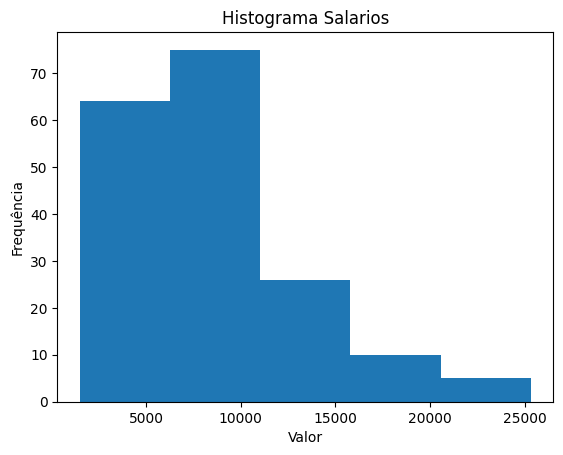

In [50]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(salarios['salario'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Salarios')

Text(0, 0.5, 'Ocorrência')

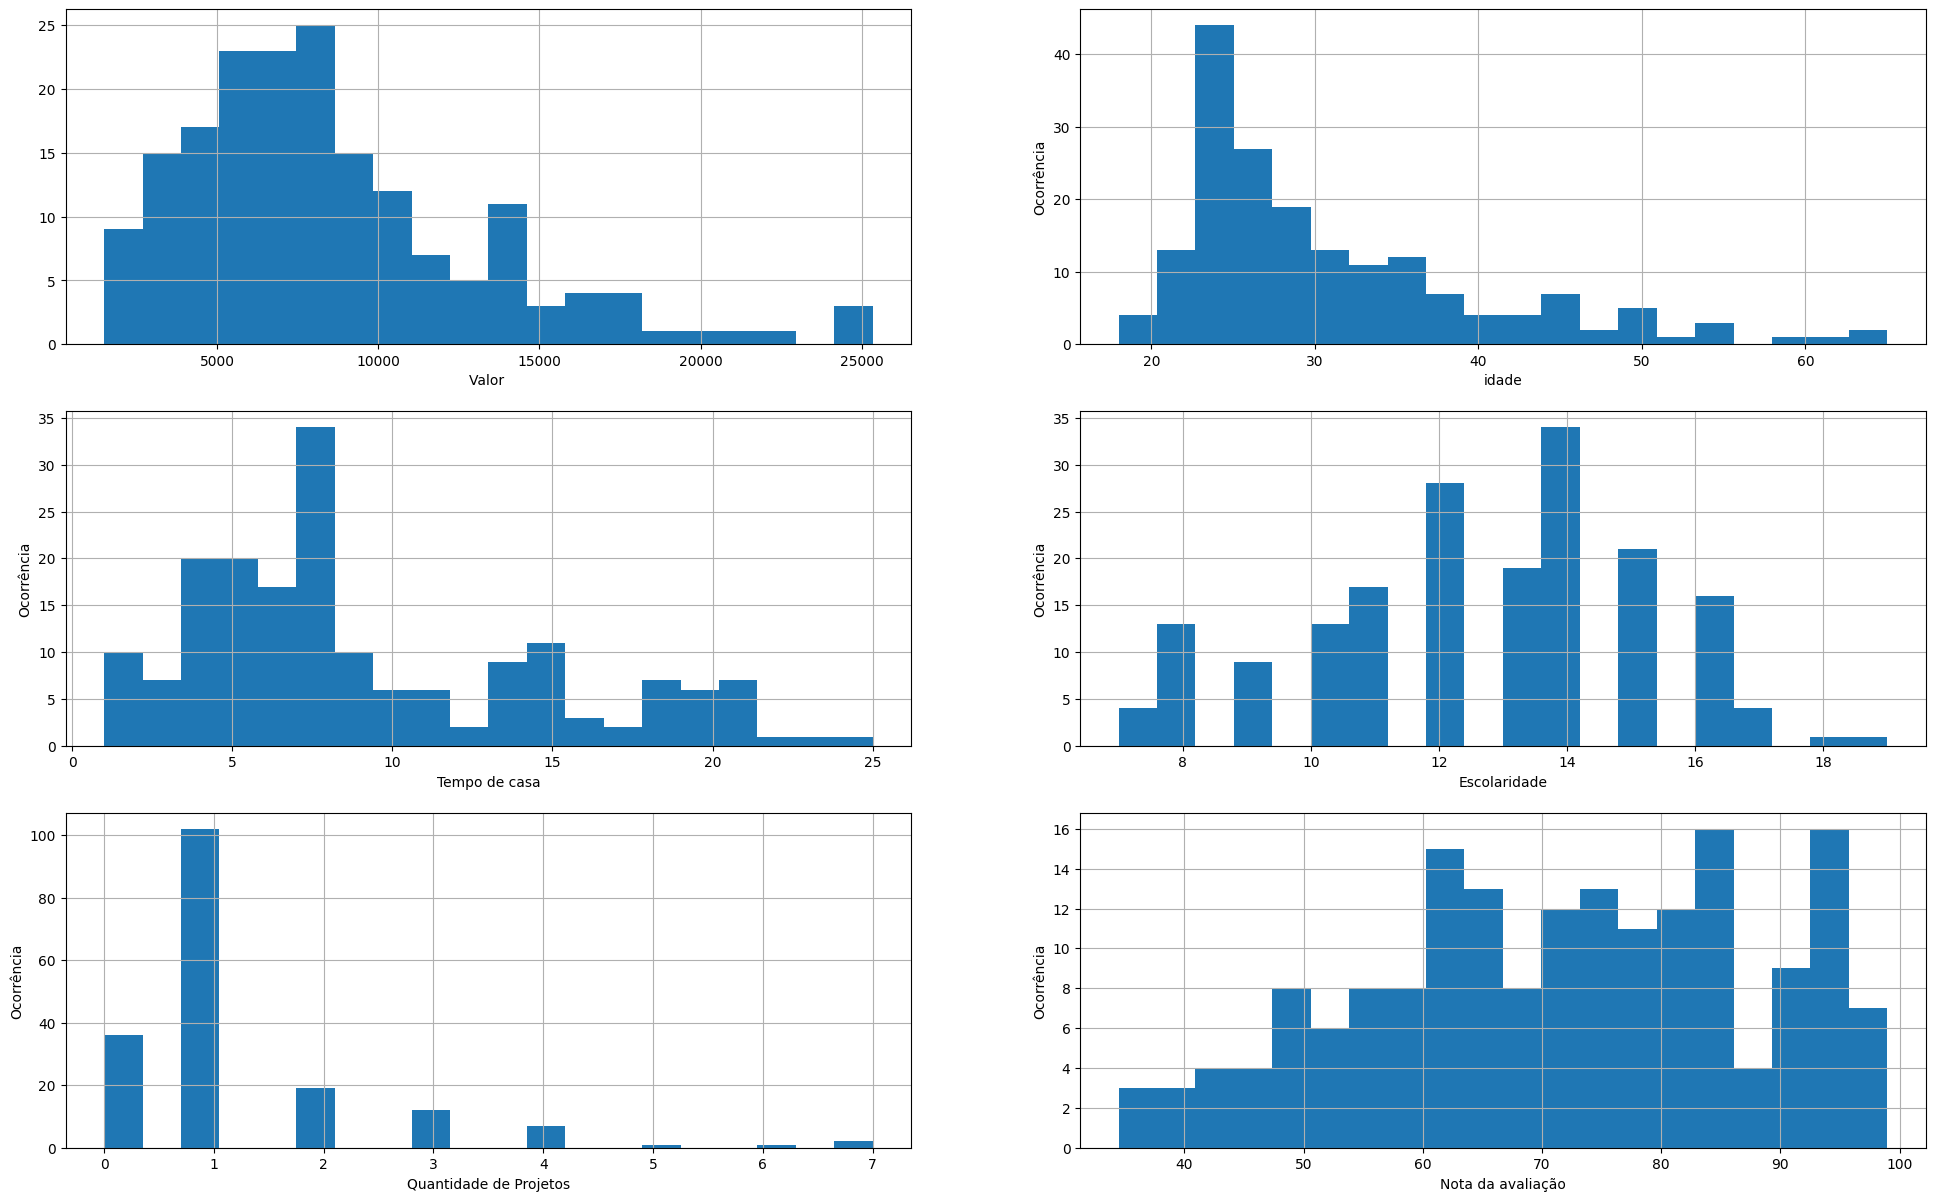

In [51]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = salarios.salario.hist(bins=20)
fig.set_xlabel('Valor ')

plt.subplot(4, 2, 2)
fig = salarios.idade.hist(bins=20)
fig.set_xlabel('idade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 3)
fig = salarios.tempocasa.hist(bins=20)
fig.set_xlabel('Tempo de casa')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 4)
fig = salarios.escolar.hist(bins=20)
fig.set_xlabel('Escolaridade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 5)
fig = salarios.qproj_estra.hist(bins=20)
fig.set_xlabel('Quantidade de Projetos')
fig.set_ylabel('Ocorrência')

plt.subplot(4, 2, 6)
fig = salarios.notaavalia.hist(bins=20)
fig.set_xlabel('Nota da avaliação')
fig.set_ylabel('Ocorrência')
